# Agrupamiento de Datos
## Curso Ingeniería Masiva de Datos
## TecMilenio
## Ejercicio Kmeans Clustering con set de Datos Mall Customers

In [2]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a id=1></a><br>
## Leer Datos

In [56]:
# Incuye aquí el código para leer los datos del archivo 'Mall_Customers.csv'


In [57]:
# Incluye aquí el código para comprobar y describir los datos leídos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id=1></a><br>
## Explorar Datos

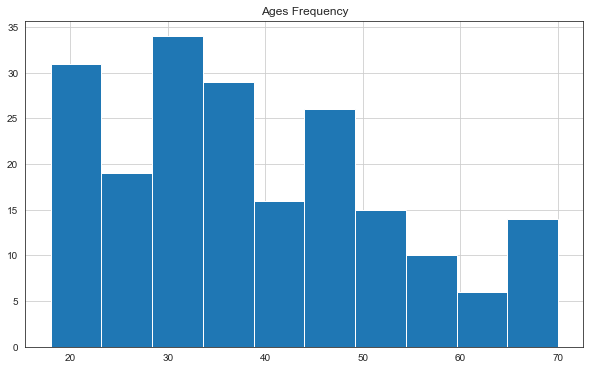

In [24]:
# Incluye aquí tu código para crear histogramas 


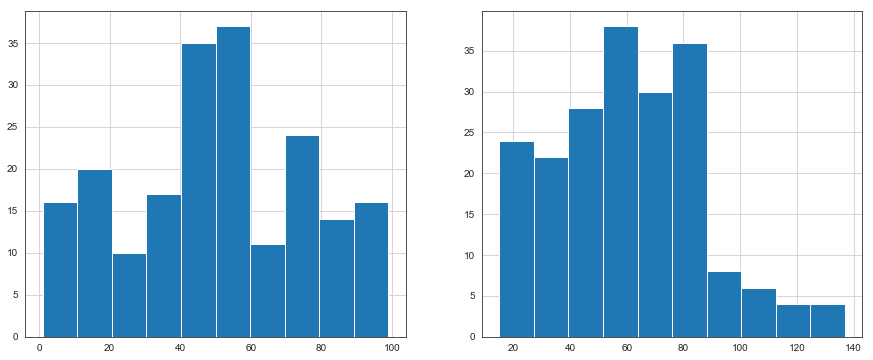

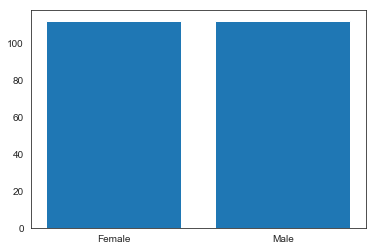

In [38]:
# Gráfica de Barras de Edades 
genders = df.Gender.value_counts()
plt.bar(genders.index, 112, width= 0.8, data=genders.values)
plt.show()

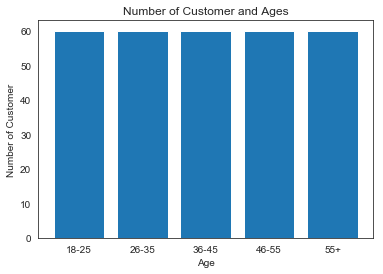

In [41]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.bar(x, 60, width= 0.8, data=y)
plt.show()

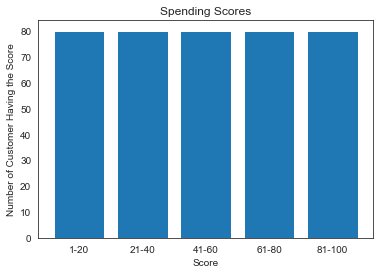

In [43]:
# Gráfica de Barras de Scores de Gastos

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]


plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.bar(ssx, 80, width = 0.8, data = ssy)
plt.show()

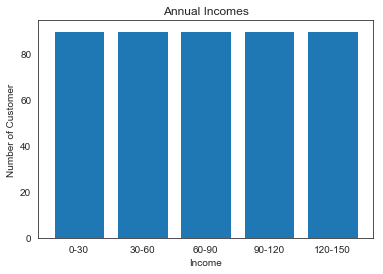

In [52]:
# Gráfica de Barras de Ingresos Anuales

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ['0-30', '30-60', '60-90', '90-120', '120-150']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.bar(aix, 90, width = 0.8 , data = aiy)
plt.show()

In [68]:
# Eliminar columda customer id y sexo para hacer K-means con los otros Edad, Score de Gato e Ingreso
#df.drop(['CustomerID'], axis = 1, inplace=True)
#df.drop(['Gender'], axis = 1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0


<a id=2></a><br>
## K-Means

# Completa el código para la gráfica del Método Elbow

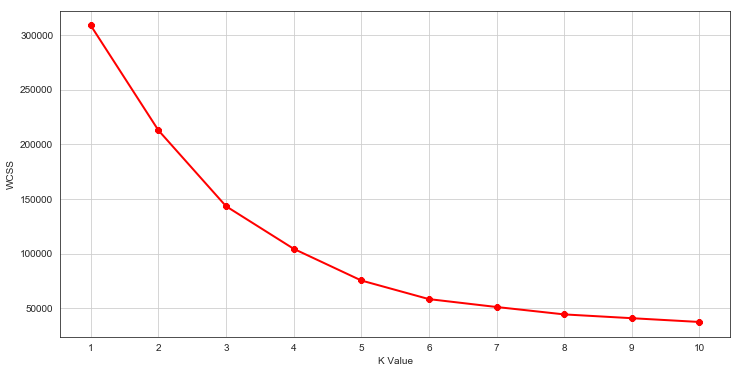

In [15]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)



## ¿Cuál es el valor de K que usarías?


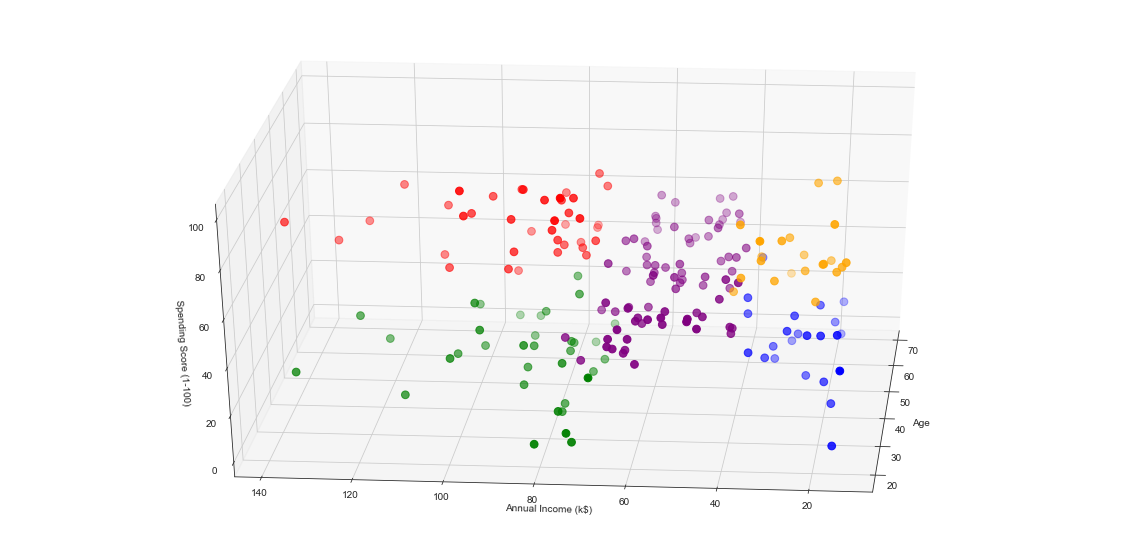

In [63]:
# completa el código para poner el número de clusters que decidiste

km = KMeans(n_clusters =    )
clusters_num = km.fit_predict(df.iloc[:,1:])

# Crea una columna nueva con el cluster
df['label'] = clusters_num

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label== 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Tenemos 5 tipos de cientes que aparecen en la gráfica en diferentes colores


# Incluye aquí la descripción de cada uno de los clusters



